# Who survives in the titatic

This is my solution for the Titanic competition form [Kaggle](https://www.kaggle.com/c/titanic), all the input files are extracted from the mentioned link. I won't upload the datasets to this repository.

I assume there is a 'titanic' folder at the same level of this notebook containing the datasets.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
gender_submission = pd.read_csv("./titanic/gender_submission.csv")

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to Kaggle's competition web page, the data dictionary is as follows:

| Variable      | Definition    | Key        |
| ------------- |:-------------:| ----------:|
| survival      | Survival      | 0 = No, 1 = Yes |
| pclass        | Ticket class  | 1 = 1st, 1 = 2nd, 3 = 3rd |
| sex           | Sex           |            |
| Age           | Age in years           |            |
| sibsp         | # of siblings / spouses aboard the Titanic           |            |
| parch         | # of parents / children aboard the Titanic           |            |
| ticket        | Ticket number           |            |
| fare          | Passenger fare           |            |
| cabin         | Cabin number           |            |
| embarked      | Port of Embarkation           | C=Cherbourg, Q=Queenstown, S=Southampton           |

We are supposed to predict the survival, i.e. 'survived', this is our class. This is naturally a binary classification problem.

Now, let's observe how the variables behave.

## Data exploration & transformation

**Notes:**
* Notice we have 891 samples, but not all of them are complete, notice age seems to have some values missing.
* Also, we have some string categorical fields, we should convert them.
* Other string fields might tell us something, we should inspect them to know if we should discard them or not.

# Sex
First, we observe genere is a string, let's convert it into binary categories.

In [4]:
# Convert Sex to binary categories
train.replace({'Sex': {'male': 1, 'female': 0}}).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### The Cabin
It seems not all values for Cabin are informed, let's see how these distribute.

In [5]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
na_cabin = train["Cabin"].isna().sum()
passengers = train["PassengerId"].count()
cabins = train["Cabin"].count()

print("Proportion of NA cabins vs total passengers {:.2f}".format(na_cabin / passengers))
print("Total of different cabins, including NA {}".format(cabins))

Proportion of NA cabins vs total passengers 0.77
Total of different cabins, including NA 204


We have way too many NA cabins, 77% of the dataset does not have the cabin informed, and we have 203 different cabins, let's see how the cabin field distribute towards the target class.

We might want to convert this field in a binary class, either has cabin or not.

In [7]:
cabin_survive = train.copy()
cabin_survive.Cabin = cabin_survive.Cabin.apply(lambda x: 1 if type(x) is str else 0)
cabin_survive.Cabin.value_counts()

0    687
1    204
Name: Cabin, dtype: int64

Now, let's plot this to have a visual perspective on the data.

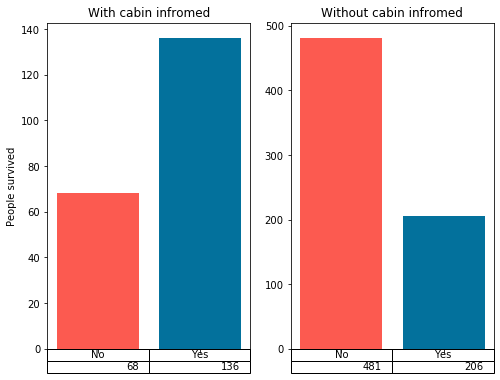

In [8]:
import matplotlib.pyplot as plt

w_cabin = cabin_survive[cabin_survive.Cabin == 1]
wo_cabin = cabin_survive[cabin_survive.Cabin == 0]
w_cabin_counts = w_cabin.Survived.value_counts(sort=False)
wo_cabin_counts = wo_cabin.Survived.value_counts(sort=False)

plt.figure(figsize=(8, 6))
plt.subplot(121)
ax = plt.bar([0, 1], w_cabin_counts, color=["xkcd:coral", 'xkcd:ocean blue'], tick_label=["", ""])
plt.ylabel("People survived")
plt.title("With cabin infromed")
plt.table(cellText=w_cabin_counts.to_numpy().reshape(1, 2), colLabels=["No", "Yes"])

plt.subplot(122)
plt.bar([0, 1], wo_cabin_counts, color=["xkcd:coral", 'xkcd:ocean blue'], tick_label=["", ""])
plt.table(cellText=wo_cabin_counts.to_numpy().reshape(1, 2), colLabels=["No", "Yes"])
plt.title("Without cabin infromed")

plt.show()

For those who has the cabin informed, 33% of the passengers didn't survived, while without cabin, 70% didn't survided.

One last lookup on those with cabin.

In [9]:
w_cabin_s = train[["PassengerId", "Cabin", "Survived"]].join(
    w_cabin[["PassengerId", "Cabin"]], how="inner", rsuffix="_informed"
)

w_cabin_s.head()

,PassengerId,Cabin,Survived,PassengerId_informed,Cabin_informed
1,2,C85,1,2,1
3,4,C123,1,4,1
6,7,E46,0,7,1
10,11,G6,1,11,1
11,12,C103,1,12,1


In [10]:
survived = w_cabin_s[w_cabin_s.Survived == 1]
survived.Cabin = survived.Cabin.apply(lambda x: x[0])
print("Survivors Cabin Letters")
survived.Cabin.value_counts()

Survivors Cabin Letters


/home/ohtar10/miniconda3/envs/ml-python/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C    35
B    35
D    25
E    24
F     8
A     7
G     2
Name: Cabin, dtype: int64

In [11]:
survived = w_cabin_s[w_cabin_s.Survived == 0]
survived.Cabin = survived.Cabin.apply(lambda x: x[0])
print("Deceased Cabin Letters")
survived.Cabin.value_counts()

Deceased Cabin Letters


C    24
B    12
E     8
D     8
A     8
F     5
G     2
T     1
Name: Cabin, dtype: int64

We can observe presence of all types of cabins (thinking in A, B, C, and D) those in cabins B, C, D, and E had higher survival rate but probably this is due to higher decks had less cabins. This field doesn't seem very promising for survival prediction. According to [Titanica](https://www.encyclopedia-titanica.org/cabins.html) The letters represented the deck the cabin is located but not the class, which is another filed in the data set.

So the conclusion is that this field don't contribute very much in the survival prediction of the passenger, however we will include only the deck letter and leave the 'na' with 'X'.

## Embarked
Now, let's see what happened with this field

In [12]:
em_unique = train.Embarked.unique()
print("Embarked unique values:", em_unique)

Embarked unique values: ['S' 'C' 'Q' nan]


Here we also have 'nan', to have a better glimpsy of the distribution, let's convert this value to a letter.

In [13]:
em_survival = train.copy()
em_survival["Embarked"].fillna('X', inplace=True)
em_survival.Embarked.value_counts()

S    644
C    168
Q     77
X      2
Name: Embarked, dtype: int64

Just two of them, so we can just leave it like this, i.e., replace the nan for a letter, probably convert it to a categorical numeric value.

## Ticket
One could not expect that much from the ticket, but let's take a look just at unique values.

In [14]:
unique_tickets = train.Ticket.unique().shape[0]
tickets = train.Ticket.value_counts()
print("Unique tickets: ", unique_tickets)
print("Total tickets: ", tickets.sum())
tickets

Unique tickets:  681
Total tickets:  891


1601        7
CA. 2343    7
347082      7
3101295     6
CA 2144     6
           ..
2650        1
347076      1
347743      1
PC 17476    1
349254      1
Name: Ticket, Length: 681, dtype: int64

It seems several people used the same ticket number, let's see how the survival rate behaves when more than one person used the same ticket.

In [15]:
ticket_survival = train.copy()
# Let's group by the ticket
groups = ticket_survival.groupby("Ticket")
# Then filter for those who share the same ticket number
share_ticket = groups.filter(lambda x: x.PassengerId.count() > 1)

print("Passengers sharing ticket: ", share_ticket.PassengerId.count())

Passengers sharing ticket:  344


It seems we have a great quantity of passengers sharing a ticket, this represents 38% of the data set. It might be worthy to keep this field .

Let's see the survival rate of these people.

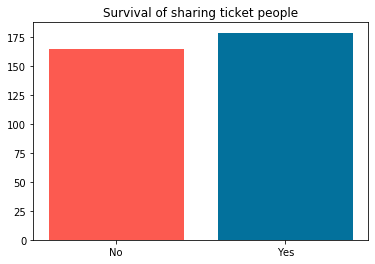

In [16]:
plt.bar([0, 1], 
        share_ticket.Survived.value_counts(sort=False), 
        color=["xkcd:coral", 'xkcd:ocean blue'], 
        tick_label=["No", "Yes"])
plt.title("Survival of sharing ticket people")
plt.show()


Seems pretty much even, let's see what happens with the rest.

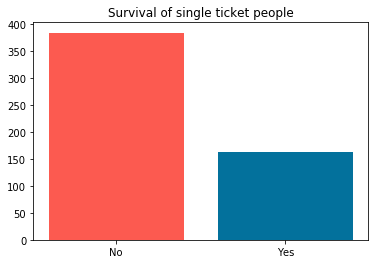

In [17]:
single_ticket = groups.filter(lambda x: x.PassengerId.count() == 1)
plt.bar([0, 1], 
        single_ticket.Survived.value_counts(sort=False), 
        color=["xkcd:coral", 'xkcd:ocean blue'], 
        tick_label=["No", "Yes"])
plt.title("Survival of single ticket people")
plt.show()

This time things don't look so even, so people sharing ticket number might have better possibilities of survival, we should preserve this field, however, it might be better to transformit into a binary category format, i.e., either the passenger share a ticket or not.

# Build the transformation pipeline
Now that we know how what do we need to do to the fields, let's construct a transformation pipeline for this dataset.

In [18]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb = LabelEncoder()
np.unique(lb.fit_transform(train.Embarked.fillna('X')))
#train.Embarked.fillna('X').unique()

array([0, 1, 2, 3])

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """This transformer will accept a pandas dataframe as input,
    and will return the numpy array of features as value"""
    def __init__(self, attribute_names, fillna_value=None):
        self.attribute_names = attribute_names
        self.fillna_value = fillna_value
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.fillna_value:
            data = X[self.attribute_names].fillna(self.fillna_value)
        else:
            data = X[self.attribute_names]
        
        # ensure the shape has at least two values
        data = data.values
        if len(data.shape) == 1:
            data = data.reshape(data.shape[0], 1)
            
        return data
    
class AttributeEncoder(BaseEstimator, TransformerMixin):
    """Given the input feature arrays, and if we want to
    binary or multi-category encode, will transorm the """
    def __init__(self, binary=False):
        self.binary = binary
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        le = None
        if self.binary:
            le = LabelBinarizer()
        else:
            le = LabelEncoder()
        cols = X.shape[1]
        transformations = []
        for c in range(cols):
            transformations.append(le.fit_transform(X[:, c]))
        return np.c_[transformations].T

class TakeNEncoder(BaseEstimator, TransformerMixin):
    """Given the input feature arrays, takes the first N
    characters of it."""
    def __init__(self, N):
        self.N = N
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        cols = X.shape[1]
        transformations = []
        f = np.vectorize(lambda x: x[self.N-1])
        for c in range(cols):
            transformations.append(f(X[:, c]))
        return np.c_[transformations].T

In [20]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

num_attribs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Sex", "Ticket", "Embarked"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs, fillna_value='XX')),
    ('cat_encoder', AttributeEncoder())
])

cabin_pipeline = Pipeline([
    ('selector', DataFrameSelector("Cabin", fillna_value='XX')),
    ('cabin_leter', TakeNEncoder(N=1)),
    ('cat_encoder', AttributeEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cabin_pipeline', cabin_pipeline),
    ('cat_pipeline', cat_pipeline)
])


In [21]:
train_transformed = full_pipeline.fit_transform(train)

### Observe the transformed data
Now that we have normalized and transformed the data, let's observe the values and how they correlate with each other and also how they contribute to the class.

In [22]:
columns = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Cabin", "Sex", "Ticket", "Embarked"]
transformed_df = pd.DataFrame(train_transformed, columns=columns)
transformed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex,Ticket,Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,8.0,1.0,523.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,2.0,0.0,596.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,8.0,0.0,669.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,2.0,0.0,49.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,8.0,1.0,472.0,2.0


In [23]:
transformed_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex,Ticket,Embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000
mean,-8.772133e-17,2.272780e-16,4.386066e-17,5.382900e-17,3.987333e-18,6.716049,0.647587,338.528620,1.538721
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,2.460739,0.477990,200.850657,0.794231
min,-1.566107e+00,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,0.000000,0.000000,0.000000,0.000000
25%,-3.693648e-01,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,8.000000,0.000000,158.500000,1.000000
50%,8.273772e-01,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,8.000000,1.000000,337.000000,2.000000
75%,8.273772e-01,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,8.000000,1.000000,519.500000,2.000000
max,8.273772e-01,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00,8.000000,1.000000,680.000000,3.000000


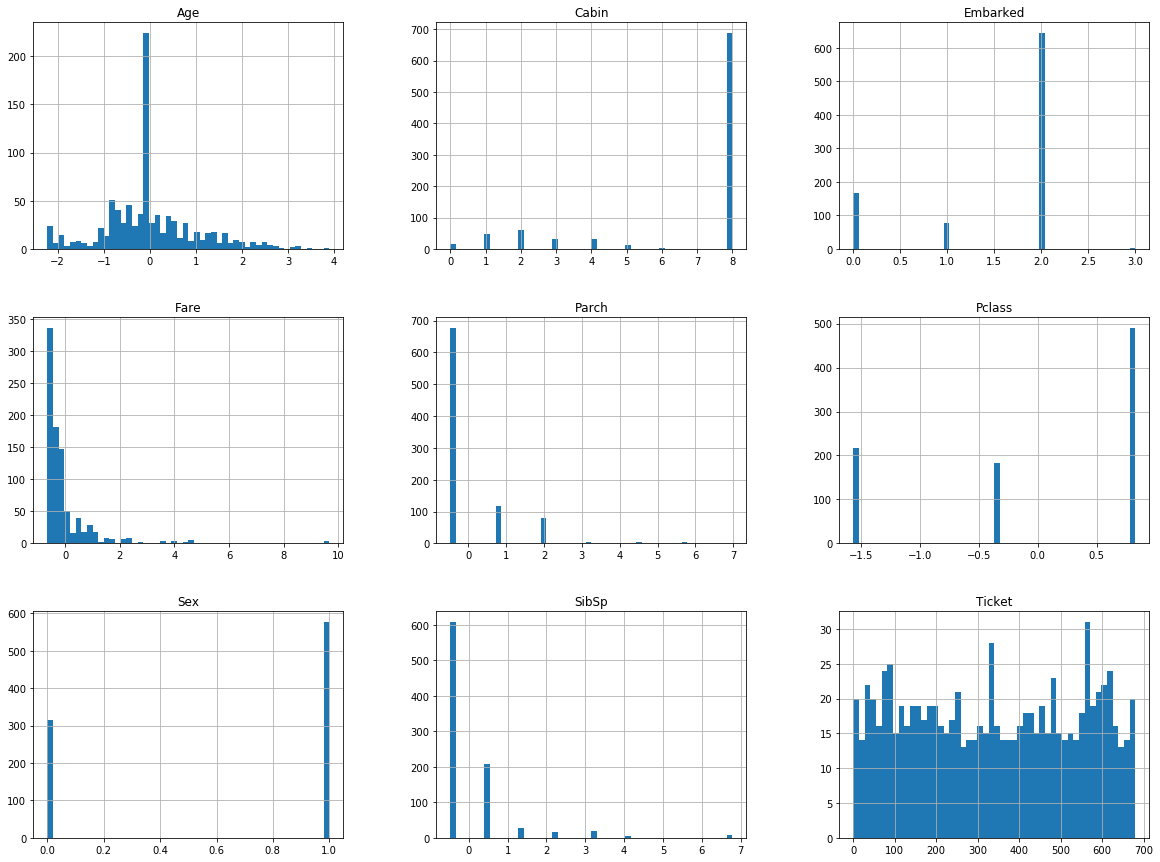

In [24]:
import matplotlib.pyplot as plt

transformed_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [25]:
transformed_df["Survived"] = train.Survived
corr_matrix = transformed_df.corr()
corr_matrix

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex,Ticket,Embarked,Survived
Pclass,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.746616,0.131900,0.319869,0.157112,-0.338481
Age,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.255783,0.081163,-0.070382,-0.014205,-0.064910
SibSp,0.083081,-0.233296,1.000000,0.414838,0.159651,0.041540,-0.114631,0.079461,0.066654,-0.035322
Parch,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.032548,-0.245489,0.020003,0.038322,0.081629
Fare,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.523013,-0.182333,-0.013885,-0.221226,0.257307
Cabin,0.746616,-0.255783,0.041540,-0.032548,-0.523013,1.000000,0.123076,0.256307,0.187015,-0.301116
Sex,0.131900,0.081163,-0.114631,-0.245489,-0.182333,0.123076,1.000000,0.059372,0.104057,-0.543351
Ticket,0.319869,-0.070382,0.079461,0.020003,-0.013885,0.256307,0.059372,1.000000,-0.006041,-0.164549
Embarked,0.157112,-0.014205,0.066654,0.038322,-0.221226,0.187015,0.104057,-0.006041,1.000000,-0.163517
Survived,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.301116,-0.543351,-0.164549,-0.163517,1.000000


From the above correlation matrix, from the Surviving standpoint, we can observe stron correlations (either possitive or negative) with Pclass, Fare, Cabin, Sex, Ticket and Embarked, let's take a closer look.

In [26]:
corr_matrix.Survived

Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Cabin      -0.301116
Sex        -0.543351
Ticket     -0.164549
Embarked   -0.163517
Survived    1.000000
Name: Survived, dtype: float64

So, let's build a model with the mentioned attributes, since this is a binary classification problem, we will try with:

* Logistic Regression
* SVM
* SGDClassifier

Also, we will try with these though not exclusive to binary classification problems:
* RandomForests
* NaiveBayes

In [27]:
%%capture
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

lr_clf = LogisticRegression()
sgd_clf = SGDClassifier()
rf_clf = RandomForestClassifier()
svc_clf = SVC()
nb_clf = GaussianNB()

lr_clf.fit(train_transformed, train.Survived.values)
sgd_clf.fit(train_transformed, train.Survived.values)
rf_clf.fit(train_transformed, train.Survived.values)
svc_clf.fit(train_transformed, train.Survived.values)
nb_clf.fit(train_transformed, train.Survived.values)

Now let's evaluate the results to find the bests model candidate and perform a grid search for the best hyperparameters.

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

def model_scoring(y, y_pred, label=None, avg="micro"):
    if label:
        print("Scores for model: ", label)
    ps = precision_score(y, y_pred, average=avg)
    rs = recall_score(y, y_pred, average=avg)
    f1 = f1_score(y, y_pred, average=avg)
    print("Precision: {}, Recall: {}, F1-Score: {}".format(ps, rs, f1))

In [29]:
lr = lr_clf.predict(train_transformed)
sgd = sgd_clf.predict(train_transformed)
rf = rf_clf.predict(train_transformed)
svc = svc_clf.predict(train_transformed)
nb = nb_clf.predict(train_transformed)

results = {
    "Logistic Regression" : lr,
    "SGD": sgd,
    "Random Forest": rf,
    "Support Vector Classifier": svc,
    "Naive Bayes Classifier": nb
}

[model_scoring(train.Survived.values, pred[1], pred[0]) for pred in results.items()]

Scores for model:  Logistic Regression
Precision: 0.797979797979798, Recall: 0.797979797979798, F1-Score: 0.7979797979797979
Scores for model:  SGD
Precision: 0.6509539842873177, Recall: 0.6509539842873177, F1-Score: 0.6509539842873177
Scores for model:  Random Forest
Precision: 0.9977553310886644, Recall: 0.9977553310886644, F1-Score: 0.9977553310886644
Scores for model:  Support Vector Classifier
Precision: 0.6588103254769921, Recall: 0.6588103254769921, F1-Score: 0.6588103254769921
Scores for model:  Naive Bayes Classifier
Precision: 0.7777777777777778, Recall: 0.7777777777777778, F1-Score: 0.7777777777777778


[None, None, None, None, None]

Look at this!, the Random Forest Classifier seems to be the most promising, followed closely by the SVM Classifier then the Logistic Regression. The rest are not bad, but compared to the mentioned, are certainly behind.

Now, let's find the best model hypterparameters with grid search

In [31]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': range(20, 100), 'criterion': ['gini', 'entropy'], 'max_features': [2, 4, 6, 8, 9, 'auto']},
    {'bootstrap': [False], 'criterion': ['gini', 'entropy'], 'n_estimators': [3, 10], 'max_features': [3, 6, 9]}
]

rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring="balanced_accuracy", n_jobs=6, verbose=1)
grid_search.fit(train_transformed, train.Survived.values)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 638 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   34.5s
[Parallel(n_jobs=6)]: Done 3038 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 4652 tasks      | elapsed:  1.8min


CPU times: user 5.74 s, sys: 176 ms, total: 5.92 s
Wall time: 1min 51s


[Parallel(n_jobs=6)]: Done 4860 out of 4860 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [32]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred = grid_search.best_estimator_.predict(train_transformed)
model_scoring(train.Survived.values, y_pred)

Precision: 0.9977553310886644, Recall: 0.9977553310886644, F1-Score: 0.9977553310886644


In [34]:
test_transformed = full_pipeline.fit_transform(test)
y_pred = grid_search.best_estimator_.predict(test_transformed)

In [35]:
results = test.copy()
results["Survived"] = y_pred
results = results[["PassengerId", "Survived"]]

In [36]:
results.to_csv('./submission.csv', index=False)

# Extra stuff

This is just experiments to understand how to manipulate the data to create the transformation pipelines.

In [37]:
raw_features = train[cat_attribs].fillna('X').values
raw_features[:,0]

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [38]:
sex = LabelEncoder().fit_transform(train.Sex.values)
embarked = LabelEncoder().fit_transform(train.Embarked.fillna('X').values)
features = np.c_[sex, embarked]
print(features[0:10])

[[1 2]
 [0 0]
 [0 2]
 [0 2]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [0 2]
 [0 0]]


In [39]:
l = [sex, embarked]
np.c_[l].T.shape

(891, 2)

In [40]:
train[cat_attribs].fillna('X').apply(LabelEncoder().fit_transform).head(10)

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0
2,0,669,2
3,0,49,2
4,1,472,2
5,1,275,1
6,1,85,2
7,1,395,2
8,0,344,2
9,0,132,0


In [41]:
v = train["Cabin"].fillna("XX").values
f = np.vectorize(lambda x: x[0])
f(v).shape

(891,)